Importing DataSet

In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

df = pd.read_csv(url)
df.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking whether the dataset is balenced or not

In [14]:
df['Survived'].value_counts()/df.shape[0]*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Univariate Analyisis

In [18]:
df['family']=df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


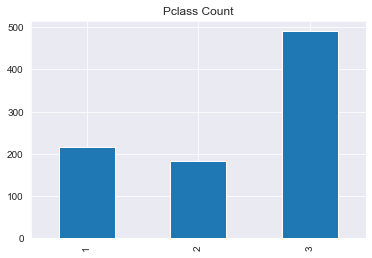

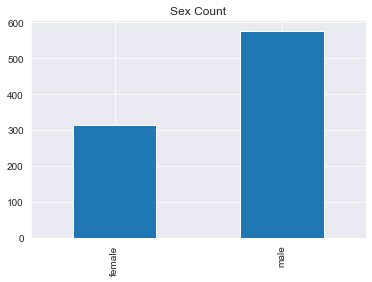

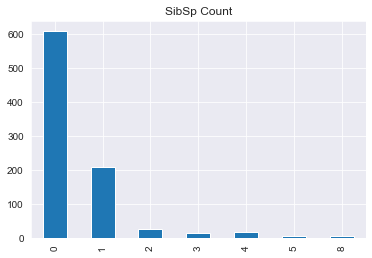

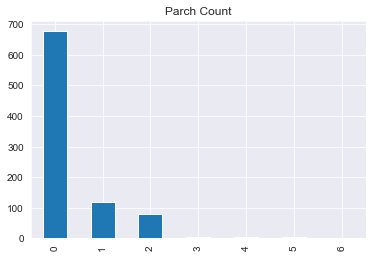

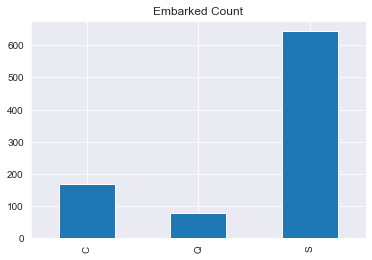

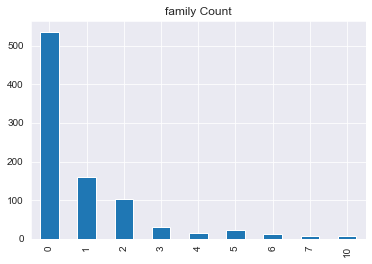

In [19]:
cols_categorical=["Pclass","Sex","SibSp","Parch","Embarked","family"]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
for i in cols_categorical:
    plt.title(i+" Count")
    df[i].value_counts().sort_index().plot(kind="bar")
    plt.show()

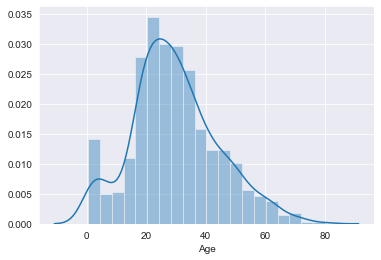

In [47]:
import seaborn as sns
import numpy as np
sns.distplot(df['Age'][df['Age'].isnull()==False])
plt.show()

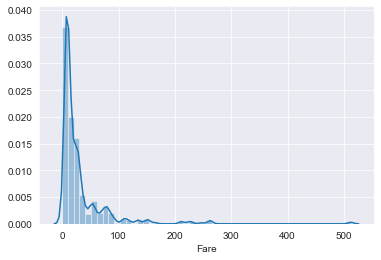

In [58]:
sns.distplot(df['Fare'])
plt.show()

Multivariate Analysis

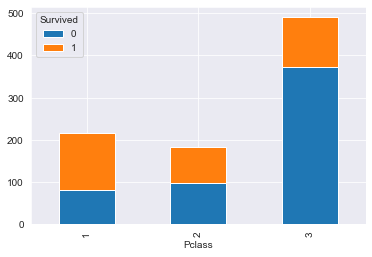

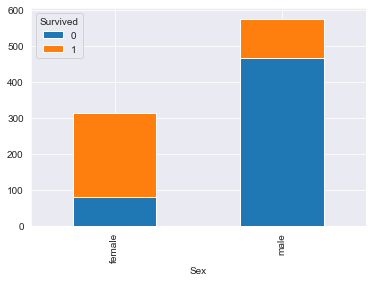

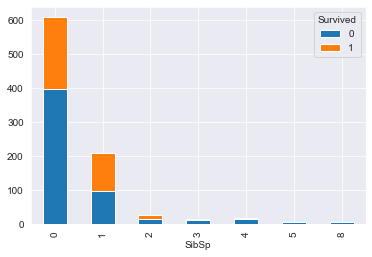

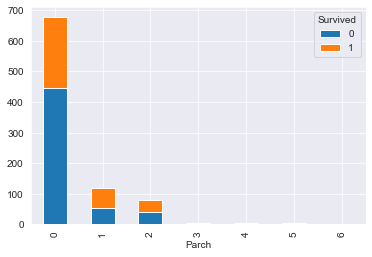

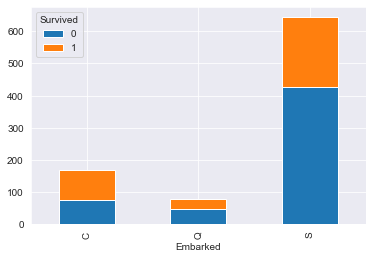

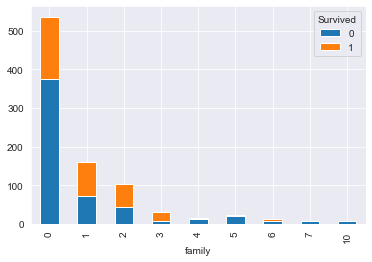

In [43]:
cols_categorical=["Pclass","Sex","SibSp","Parch","Embarked","family"]
for i in cols_categorical:
    df.groupby(i)['Survived'].value_counts().sort_index().unstack().plot(kind="bar",stacked=True)
    plt.show()

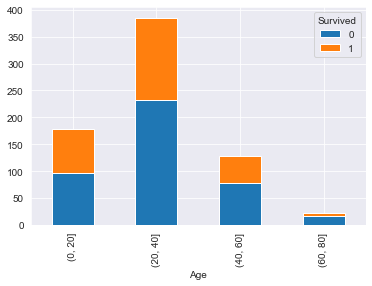

In [53]:
df.groupby(pd.cut(df['Age'], np.arange(0, 81, 20)))['Survived'].value_counts().sort_index().unstack().plot(kind="bar",stacked=True)

In [62]:
df.groupby('Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

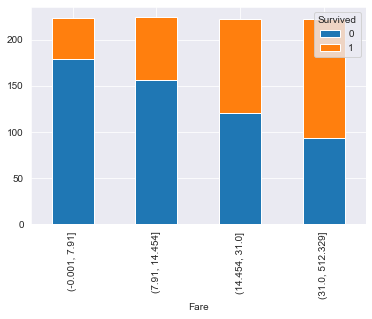

In [70]:
df.groupby( pd.qcut(df['Fare'],q=[0, .25, .5, .75 ,1]))['Survived'].value_counts().sort_index().unstack().plot(kind="bar",stacked=True)

Feature Engineering

In [55]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    df.head()
get_titles()

{'Col', 'Mrs', 'Ms', 'Dr', 'Mme', 'Miss', 'Major', 'Jonkheer', 'Mr', 'Mlle', 'Capt', 'the Countess', 'Lady', 'Sir', 'Don', 'Rev', 'Master'}


In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


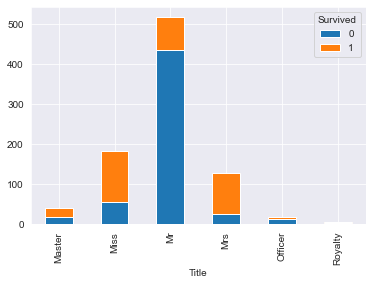

In [57]:
df.groupby('Title')['Survived'].value_counts().sort_index().unstack().plot(kind="bar",stacked=True)

In [110]:
a=df.groupby('Title')['Age'].median()

In [74]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [111]:
d={}
for i in a.index:
    d[i]=df[df['Age'].isnull()][df['Title']==i].index
d

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


{'Master': Int64Index([65, 159, 176, 709], dtype='int64'),
 'Miss': Int64Index([ 28,  32,  47,  82, 109, 128, 180, 198, 229, 235, 240, 241, 264,
             274, 300, 303, 306, 330, 358, 359, 368, 409, 485, 502, 564, 573,
             593, 596, 612, 653, 680, 697, 727, 792, 863, 888],
            dtype='int64'),
 'Mr': Int64Index([  5,  17,  26,  29,  36,  42,  45,  46,  48,  55,
             ...
             825, 826, 828, 832, 837, 839, 846, 859, 868, 878],
            dtype='int64', length=119),
 'Mrs': Int64Index([ 19,  31, 140, 166, 186, 256, 334, 347, 367, 375, 415, 431, 457,
             533, 578, 669, 849],
            dtype='int64'),
 'Officer': Int64Index([766], dtype='int64'),
 'Royalty': Int64Index([], dtype='int64')}

In [117]:
for i in a.index:
    for j in d[i]:
        df.iloc[j,5]=a[i]

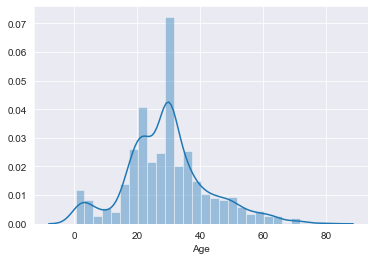

In [120]:
sns.distplot(df['Age'])

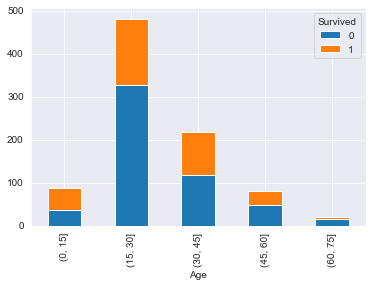

In [127]:
df.groupby(pd.cut(df['Age'], np.arange(0, 90, 15)))['Survived'].value_counts().sort_index().unstack().plot(kind="bar",stacked=True)

In [145]:
df.drop(['PassengerId','Name', 'Ticket','Cabin', 'Embarked',"SibSp","Parch"],inplace=True,axis=1)

In [135]:
df['Age_bin']=pd.cut(df['Age'], np.arange(0, 90, 15))

In [137]:
df['Fare_bin']=pd.qcut(df['Fare'],q=[0, .25, .5, .75 ,1])

In [138]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family,Title,Age_NAN,Age_bin,Fare_bin
0,0,3,male,22.0,1,0,7.2500,1,Mr,0,"(15, 30]","(-0.001, 7.91]"
1,1,1,female,38.0,1,0,71.2833,1,Mrs,0,"(30, 45]","(31.0, 512.329]"
2,1,3,female,26.0,0,0,7.9250,0,Miss,0,"(15, 30]","(7.91, 14.454]"
3,1,1,female,35.0,1,0,53.1000,1,Mrs,0,"(30, 45]","(31.0, 512.329]"
4,0,3,male,35.0,0,0,8.0500,0,Mr,0,"(30, 45]","(7.91, 14.454]"


In [140]:
df['family']=df['family']+1
df['Singleton'] = df['family'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['family'].map(lambda s: 1 if 2 <= s <= 4 else 0)

In [147]:
df['Sex'] = df['Sex'].map(lambda s: 1 if s=="male" else 0)

In [151]:
df.drop(['Age','Fare','family',"Title"],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age_NAN,Age_bin,Fare_bin,Singleton,SmallFamily
0,0,3,1,0,"(15, 30]","(-0.001, 7.91]",0,1
1,1,1,0,0,"(30, 45]","(31.0, 512.329]",0,1
2,1,3,0,0,"(15, 30]","(7.91, 14.454]",1,0
3,1,1,0,0,"(30, 45]","(31.0, 512.329]",0,1
4,0,3,1,0,"(30, 45]","(7.91, 14.454]",1,0


In [158]:
encoded = pd.get_dummies( df[['Age_bin','Fare_bin']],drop_first = True )
encoded.head()

,"Age_bin_(15, 30]","Age_bin_(30, 45]","Age_bin_(45, 60]","Age_bin_(60, 75]","Fare_bin_(7.91, 14.454]","Fare_bin_(14.454, 31.0]","Fare_bin_(31.0, 512.329]"
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0


In [161]:
encoded2 = pd.get_dummies( df['Pclass'],drop_first = True,prefix='Pclass')
encoded2.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [162]:
df = pd.concat([df,encoded,encoded2], axis=1)
df.head()

,Survived,Pclass,Sex,Age_NAN,Age_bin,Fare_bin,Singleton,SmallFamily,"Age_bin_(15, 30]","Age_bin_(30, 45]","Age_bin_(45, 60]","Age_bin_(60, 75]","Fare_bin_(7.91, 14.454]","Fare_bin_(14.454, 31.0]","Fare_bin_(31.0, 512.329]",Pclass_2,Pclass_3
0,0,3,1,0,"(15, 30]","(-0.001, 7.91]",0,1,1,0,0,0,0,0,0,0,1
1,1,1,0,0,"(30, 45]","(31.0, 512.329]",0,1,0,1,0,0,0,0,1,0,0
2,1,3,0,0,"(15, 30]","(7.91, 14.454]",1,0,1,0,0,0,1,0,0,0,1
3,1,1,0,0,"(30, 45]","(31.0, 512.329]",0,1,0,1,0,0,0,0,1,0,0
4,0,3,1,0,"(30, 45]","(7.91, 14.454]",1,0,0,1,0,0,1,0,0,0,1


In [163]:
df.drop(['Pclass','Age_bin','Fare_bin'],inplace=True,axis=1)
df.head()

,Survived,Sex,Age_NAN,Singleton,SmallFamily,"Age_bin_(15, 30]","Age_bin_(30, 45]","Age_bin_(45, 60]","Age_bin_(60, 75]","Fare_bin_(7.91, 14.454]","Fare_bin_(14.454, 31.0]","Fare_bin_(31.0, 512.329]",Pclass_2,Pclass_3
0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,1,0,0,0,1


In [168]:
X=df[list(df.columns)[1:]]
y=df['Survived']

In [170]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=101)

In [171]:
xtrain.shape

(623, 13)

In [172]:
xtest.shape

(268, 13)

In [173]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.8171641791044776

Applying GridSearchCV

In [175]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [178]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [179]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}


In [180]:
grid_search.best_score_

0.8202247191011236

In [182]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 2, min_samples_split= 5, splitter= 'best')
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.832089552238806

This is the method for Decision Tree